In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [13]:
full_dataset = pd.read_csv('/Users/sylvia/Documents/GitHub/Machine-Learning-Project/dataset_diabetes/re-admission/diabetic_data.csv')

In [6]:
pd.options.display.max_columns = 55

In [9]:
full_dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
print(full_dataset.shape)

(101766, 50)


# Merge Datasets with IDs_mapping

In [22]:
# Split id_mapping into 3 unique dataframes

In [14]:
f = open('/Users/sylvia/Documents/GitHub/Machine-Learning-Project/dataset_diabetes/re-admission/IDs_mapping.csv', 'r')    # 'r' for read
lines = f.readlines()
f.close()

In [15]:
indices = [i for i, x in enumerate(lines) if x == ',\n']

In [16]:
indices

[9, 41]

In [18]:
admission_type = pd.read_csv('/Users/sylvia/Documents/GitHub/Machine-Learning-Project/dataset_diabetes/re-admission/IDs_mapping.csv', skiprows=list(range(9,len(lines))))

rows_skip = list(range(0,10)) + list(range(41, len(lines)))
discharge_disposition = pd.read_csv('/Users/sylvia/Documents/GitHub/Machine-Learning-Project/dataset_diabetes/re-admission/IDs_mapping.csv', skiprows=rows_skip)

admission_source = pd.read_csv('/Users/sylvia/Documents/GitHub/Machine-Learning-Project/dataset_diabetes/re-admission/IDs_mapping.csv', skiprows=list(range(42)))

In [23]:
## Combine values in all three ID tables

In [19]:
##1 admissioin_type
## make 'Not Available', 'NaN', and 'Not Mapped' all 'NA'
for i in range(len(admission_type)):
    x = admission_type['description'][i]
    if (x == 'Not Available' or x == 'Not Mapped'):
        admission_type['description'][i] = np.nan

/Users/sylvia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
# discharge_disposition

## make 'Unknown/Invalid', 'NaN', and 'Not Mapped' all 'NA'
for i in range(len(discharge_disposition)):
    x = discharge_disposition['description'][i]
    if (x == 'Unknown/Invalid' or x == 'Not Mapped'):
        discharge_disposition['description'][i] = np.nan
    elif(pd.isna(x)):
        continue
    elif ('Expired' in x):
        discharge_disposition['description'][i] = 'Expired'

/Users/sylvia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/sylvia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [21]:
# admission_source

## make 'Not Available', 'NaN', 'Unknown/Invalid' and 'Not Mapped' all 'NA'
for i in range(len(admission_source)):
    x = admission_source['description'][i]
    if(pd.isna(x)):
        continue
    elif (x.strip() == 'Not Available' or x.strip() == 'Not Mapped' or x.strip() == 'Unknown/Invalid'):
        admission_source['description'][i] = np.nan

/Users/sylvia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
# merge datasets
ds = full_dataset.merge(admission_type, how = 'left', on='admission_type_id')
ds2 = ds.merge(discharge_disposition, how = 'left', on = 'discharge_disposition_id')
full_dataset = ds2.merge(admission_source, how = 'left', on = 'admission_source_id')
full_dataset.rename(columns={"description_x": "admissionType",
                             "description_y": "dischargeDisposition",
                             "description" : "admissionSource"}, inplace = True)

In [26]:
full_dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admissionType,dischargeDisposition,admissionSource
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN,NaN,Physician Referral
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room


In [27]:
full_dataset.drop(['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis = 1, inplace = True)
full_dataset.shape

(101766, 50)

In [36]:
full_dataset['dischargeDisposition'].value_counts()

Discharged to home                                                                                           60234
Discharged/transferred to SNF                                                                                13954
Discharged/transferred to home with home health service                                                      12902
Discharged/transferred to another short term hospital                                                         2128
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1993
Expired                                                                                                       1652
Discharged/transferred to another type of inpatient care institution                                          1184
Discharged/transferred to ICF                                                                                  815
Left AMA                                                                        

In [37]:
full_dataset['admissionType'].value_counts()

Emergency        53990
Elective         18869
Urgent           18480
Trauma Center       21
Newborn             10
Name: admissionType, dtype: int64

In [38]:
full_dataset['admissionSource'].value_counts()

 Emergency Room                                               57494
 Physician Referral                                           29565
Transfer from a hospital                                       3187
 Transfer from another health care facility                    2264
Clinic Referral                                                1104
 Transfer from a Skilled Nursing Facility (SNF)                 855
HMO Referral                                                    187
 Court/Law Enforcement                                           16
 Transfer from hospital inpt/same fac reslt in a sep claim       12
 Transfer from critial access hospital                            8
 Extramural Birth                                                 2
Normal Delivery                                                   2
 Transfer from Ambulatory Surgery Center                          2
 Sick Baby                                                        1
Name: admissionSource, dtype: int64

# Dummify Response Variable - readmitted_30
readmitted = 2 if readmitted<30
readmitted = 1 if readmitted>30
readmitted = 0 if not readmitted 
(we might need to change 2 to 1 and 1 to 0, when we focuse on readmitted within 30 days)


In [47]:
full_dataset['readmitted'] = ['Yes' if x == '<30' else 'No' for x in full_dataset['readmitted']]

In [49]:
full_dataset['readmitted'].value_counts()

No    100114
Name: readmitted, dtype: int64

# Remove unnecessary columns

In [30]:
# Remove weight from dataset (97% missing)
full_dataset.drop(['weight'], axis = 1, inplace = True)

In [32]:
'''If only one value in column, remove column

This includes only citoglipton and examide
If less than 1000 (1%) not 'No' in column, remove column

Can change threshold number, calculated columns below
'''
nos = []
for i in range(18,43):
    col = full_dataset.columns[i]
    numNotNo = len(full_dataset[full_dataset[col] != 'No'])
    if (numNotNo < 1000):
        nos.append(col)
        

In [33]:
nos

['nateglinide',
 'chlorpropamide',
 'acetohexamide',
 'tolbutamide',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

In [34]:
full_dataset.drop(nos, axis = 1, inplace = True)

In [35]:
full_dataset.shape

(101766, 34)

In [39]:
# Remove patients if have 'expired'

# This remove 1,652 rows
expired = full_dataset[full_dataset['dischargeDisposition'] == 'Expired'].index
full_dataset.drop(expired, axis = 0, inplace = True)

In [40]:
full_dataset.shape

(100114, 34)

# drop columns that occur less than 1000 times

In [41]:
lessFreq = []
for i in range(10, len(df.columns)):
    col = df.columns[i]
    try:
        if(df[col].value_counts()[1] < 1000):
            lessFreq.append(col)
    except:
        continue

NameError: name 'df' is not defined

In [ ]:
df.drop(lessFreq, axis=1, inplace=True)

# Make columns for diagnosis categories
Convert icd9 codes to to categories

This is under the diag_1,2,3 column


In [42]:
def code_to_category(icd9code):
    try:
        icd9code = float(icd9code)
        if (icd9code >= 390 and icd9code < 460) or icd9code == 785:
            return 'Circulatory'
        if (icd9code >= 460 and icd9code < 520) or icd9code == 786:
            return 'Respiratory'
        if (icd9code >= 520 and icd9code < 580) or icd9code == 787:
            return 'Digestive'
        if (icd9code >= 250 and icd9code < 251):
            return 'Diabetes'
        if (icd9code >= 800 and icd9code < 1000):
            return 'Injury'
        if (icd9code >= 710 and icd9code < 740):
            return 'Musculoskeletal'
        if (icd9code >= 580 and icd9code < 630) or icd9code == 788:
            return 'Genitourinary'
        if (icd9code >= 140 and icd9code < 240) or icd9code == 780 or icd9code == 781 or icd9code == 784 or (icd9code >= 790 and icd9code < 800):
            return 'Neoplasms'
        if (icd9code >= 240 and icd9code < 250) or (icd9code >= 251 and icd9code < 280) or (icd9code >= 680 and icd9code < 710) or icd9code == 782:
            return 'Neoplasms'
        else:
            return 'Other'
    except:
        if (icd9code == '?'):
            return '?'
        return 'Other'

In [43]:
full_dataset['diag_1_cat'] = [code_to_category(x) for x in full_dataset['diag_1']]
full_dataset['diag_2_cat'] = [code_to_category(x) for x in full_dataset['diag_2']]
full_dataset['diag_3_cat'] = [code_to_category(x) for x in full_dataset['diag_3']]

In [44]:
full_dataset.drop(['diag_1', 'diag_2','diag_3'], axis = 1, inplace = True)

# Readmission by time in hospital

In [46]:
#There are no missing values in the "time in hospital"
print(sum(full_dataset['time_in_hospital'].isna()))
print(full_dataset['time_in_hospital'].describe())

0
count    100114.000000
mean          4.389646
std           2.974531
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64


In [9]:
df = full_dataset

In [14]:
num_readmitted = df.groupby(['time_in_hospital', 'readmitted']).agg({'readmitted':['count']})
num_readmitted.columns = num_readmitted.columns.droplevel(0)
num_readmitted = num_readmitted.reset_index()
readmt = num_readmitted[num_readmitted['readmitted'] == 'Yes']

In [15]:
time_count = num_readmitted.groupby('time_in_hospital').sum().reset_index()
perc_readmitted = readmt.merge(time_count, on = 'time_in_hospital')
perc_readmitted['readmit_perc'] = perc_readmitted['count_x']/perc_readmitted['count_y']
perc_admitted = perc_readmitted.drop(['readmitted', 'count_x', 'count_y'], axis=1)

Text(0.5, 1.0, 'Readmission by Time Spent in Hospital')

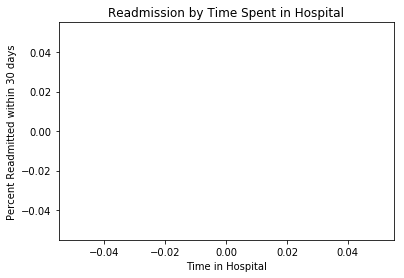

In [16]:
plt.scatter(perc_admitted['time_in_hospital'], perc_readmitted['readmit_perc'])
plt.ylabel('Percent Readmitted within 30 days')
plt.xlabel('Time in Hospital')
plt.title('Readmission by Time Spent in Hospital')

# readmissions by number of medications